In [1]:
##import dependencies 
import sqlalchemy
from sqlalchemy import create_engine
from postgres_password import password 
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
##create engine to connect to database
dbuser = 'postgres'
dbpassword = password
dbhost = 'localhost'
dbport = '5432'
dbname= 'Employees_db'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")

In [3]:
##use pandas to query the database and store as dataframe
salaries=pd.read_sql("SELECT * FROM salaries", engine)
print(salaries.shape)
salaries.head()

(300024, 5)


,emp_no,salary,from_date,to_date,salary_id
0,10001,60117,1986-06-26,1987-06-26,1
1,10002,65828,1996-08-03,1997-08-03,2
2,10003,40006,1995-12-03,1996-12-02,3
3,10004,40054,1986-12-01,1987-12-01,4
4,10005,78228,1989-09-12,1990-09-12,5


In [4]:
##create salary range bins 
bins=[39999,60000,80000,100000,130000]
bin_names=['40k-60k','60k-80k','80k-100k','100k-130k']
salaries['salary_ranges']=pd.cut(salaries['salary'],bins,labels=bin_names)
print(salaries.shape)
salaries.head()

(300024, 6)


,emp_no,salary,from_date,to_date,salary_id,salary_ranges
0,10001,60117,1986-06-26,1987-06-26,1,60k-80k
1,10002,65828,1996-08-03,1997-08-03,2,60k-80k
2,10003,40006,1995-12-03,1996-12-02,3,40k-60k
3,10004,40054,1986-12-01,1987-12-01,4,40k-60k
4,10005,78228,1989-09-12,1990-09-12,5,60k-80k


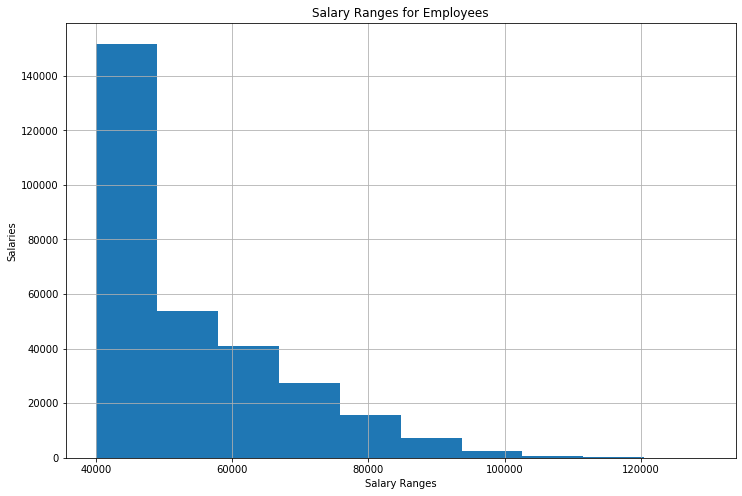

In [5]:
##create histogram of data
hist=salaries.hist(column='salary',figsize=(12,8))
plt.xlabel('Salary Ranges')
plt.ylabel('Salaries')
plt.title('Salary Ranges for Employees')
plt.savefig(os.path.join('output','Salary Ranges for Employees.png'))

In [6]:
##use pandas to query the database and store as dataframe
titles=pd.read_sql("SELECT * FROM titles", engine)
print(titles.shape)
titles.head()

(443308, 5)


,emp_no,title,from_date,to_date,title_id
0,10001,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,Staff,1996-08-03,9999-01-01,2
2,10003,Senior Engineer,1995-12-03,9999-01-01,3
3,10004,Engineer,1986-12-01,1995-12-01,4
4,10004,Senior Engineer,1995-12-01,9999-01-01,5


In [7]:
##merge salaires dataframe to titles dataframe to get salaries per title
merged_data=pd.merge(titles, salaries, on="emp_no", how="left")
print(merged_data.shape)
merged_data.head()

(443308, 10)


,emp_no,title,from_date_x,to_date_x,title_id,salary,from_date_y,to_date_y,salary_id,salary_ranges
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,60117,1986-06-26,1987-06-26,1,60k-80k
1,10002,Staff,1996-08-03,9999-01-01,2,65828,1996-08-03,1997-08-03,2,60k-80k
2,10003,Senior Engineer,1995-12-03,9999-01-01,3,40006,1995-12-03,1996-12-02,3,40k-60k
3,10004,Engineer,1986-12-01,1995-12-01,4,40054,1986-12-01,1987-12-01,4,40k-60k
4,10004,Senior Engineer,1995-12-01,9999-01-01,5,40054,1986-12-01,1987-12-01,4,40k-60k


In [8]:
title_group=merged_data.groupby(['title'])
avg_salary=title_group['salary'].mean()
avg_salary_df=pd.DataFrame(avg_salary)
avg_salary_df=avg_salary_df.reset_index()
avg_salary_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


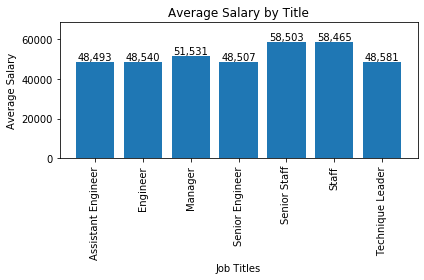

In [9]:
##plot average salary per job title and save plot as png file
x=np.arange(len(avg_salary_df['title']))
avgs=avg_salary_df['salary']

plt.bar(x,avg_salary_df['salary'],align='center')
plt.xticks(x,avg_salary_df['title'],rotation='vertical')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.title('Average Salary by Title')
plt.ylim(0,max(avg_salary_df['salary'])+10000)
plt.tight_layout()
plt.text(0,avgs[0]+1000,"{:,.0f}".format(avgs[0]),ha='center')
plt.text(1,avgs[1]+1000,"{:,.0f}".format(avgs[1]),ha='center')
plt.text(2,avgs[2]+1000,"{:,.0f}".format(avgs[2]),ha='center')
plt.text(3,avgs[3]+1000,"{:,.0f}".format(avgs[3]),ha='center')
plt.text(4,avgs[4]+1000,"{:,.0f}".format(avgs[4]),ha='center')
plt.text(5,avgs[5]+1000,"{:,.0f}".format(avgs[5]),ha='center')
plt.text(6,avgs[6]+1000,"{:,.0f}".format(avgs[6]),ha='center')
plt.savefig(os.path.join('output','Average Salary by Title.png'))